![img](https://drive.google.com/uc?export=view&id=1kgX98Ziw9LzgBCT2BxChttfrTcBltLej)


# MODULO 2. UNIDAD 1. Encuentro 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats as ss

# Lectura de datos 

### Ejemplo empresas

In [2]:
#Lectura de base df1
url="https://drive.google.com/file/d/17HgGADpdQUcuVfjx17Jy85FVWA2sA9cU/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df1 = pd.read_csv(path, sep=';')

In [3]:
#Visualización de la base de datos
df1.sample(5)

Empresa  Cant_empleados  Aportes Satisf    Categ  Ing
14       15               2       15      S  Exp_hab  158
7         8               2       28      S  Exp_hab  192
15       16               3       33     MS   No_Exp  278
12       13               0        0     MS   No_Exp  132
0         1               1       12     PS   No_Exp  173

###Ejemplo industriales 

In [4]:
url="https://drive.google.com/file/d/1ZXbF8uude4elcGXuhcE41yTHW7-3FA5C/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df2 = pd.read_csv(path, sep=';')
df2.head()

OBS  HORASEM  TIPOCUP  EDAD  EDUCAC  SEXO  INGRPER  INGRFLIA  SATISF
0    1       50        1    35      20     1     78.3      85.3       2
1    2       50        4    33      12     2     25.2      25.2       1
2    3       50        2    39      18     1     60.8      60.8       2
3    4       30        1    35      16     1     38.4      38.4       2
4    5       32        2    35      12     2     31.0      33.5       1

In [7]:
df2.dtypes

OBS           int64
HORASEM       int64
TIPOCUP       int64
EDAD          int64
EDUCAC        int64
SEXO          int64
INGRPER     float64
INGRFLIA    float64
SATISF        int64
dtype: object

#ESTIMACIÓN PUNTUAL

$\bar{x} \longrightarrow \mu $

$\bar{x}=\frac{\sum_{i=1}^j x_i}{n}$

$\hat{p} \longrightarrow P$

$\hat{p} =\frac{X}{n}$

$\hat{s^2} \longrightarrow \sigma^2$

$\hat{s^2}=\frac{\sum_{i=1}^j (x_i-\bar{x})^2}{n-1}$

**df1 Empresas:**

In [8]:
#Con mumpy (estimación puntual)
np.var(df1.Aportes)

175.5

In [9]:
round(np.var(df1.Aportes, ddof=1),2)

184.74

In [10]:
#Con pandas (estimación puntual corregida)
round(df1["Aportes"].var(),2)

184.74

**df2 Industriales:**

# INTERVALOS DE CONFIANZA

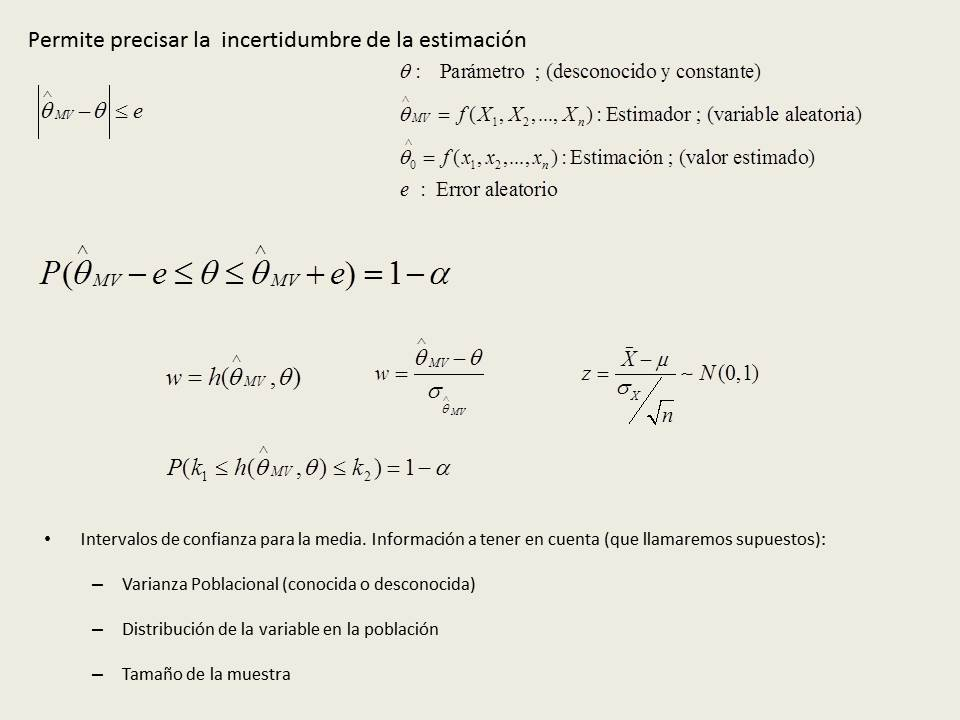

### Intervalo de confianza para la media

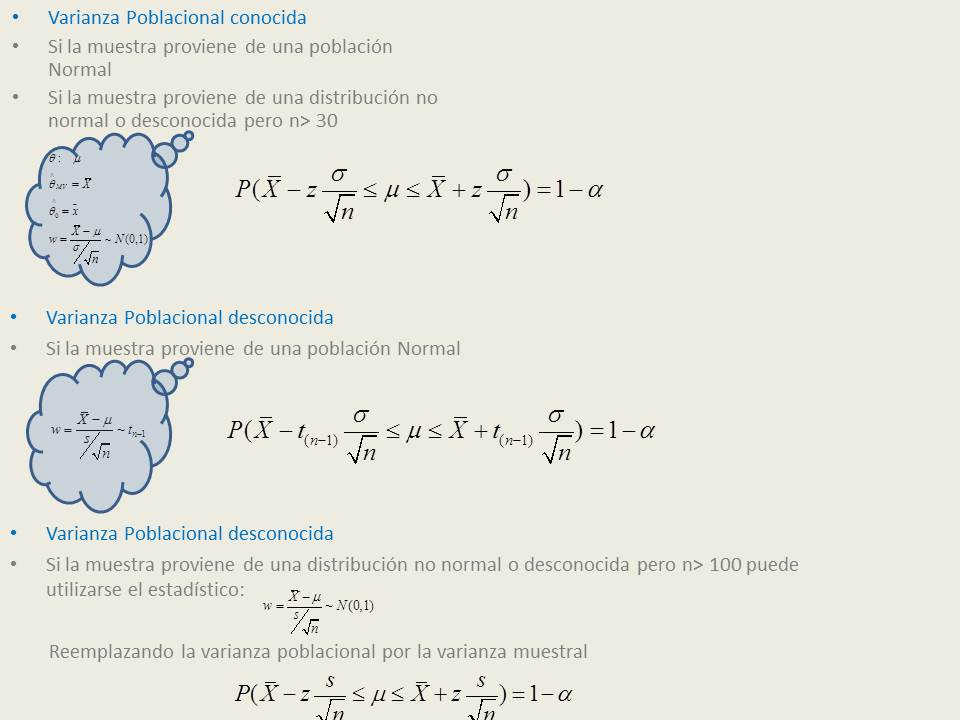

**df1 Empresas**

In [11]:
ss.t.interval(0.95,len(df1['Aportes'])-1, loc=np.mean(df1['Aportes']), scale=ss.sem(df1['Aportes'])) # .sem    el error estándar de la media

(15.638844978249061, 28.36115502175094)

In [12]:
ss.norm.interval(0.95, loc=np.mean(df1['Aportes']), scale=ss.sem(df1['Aportes']))

(16.043243451288106, 27.956756548711894)

In [13]:
df1.dtypes

Empresa            int64
Cant_empleados     int64
Aportes            int64
Satisf            object
Categ             object
Ing                int64
dtype: object

**df2 Industriales**

In [14]:
round(np.mean(df2['INGRPER']),2)

32.45

In [15]:
ss.t.interval(0.95, len(df2['INGRPER'])-1, loc=np.mean(df2['INGRPER']), scale=ss.sem(df2['INGRPER']))

(29.351133297517123, 35.546866702482845)

In [16]:
ss.norm.interval(0.95, loc=np.mean(df2['INGRPER']), scale=ss.sem(df2['INGRPER']))

(29.388998339820795, 35.50900166017917)

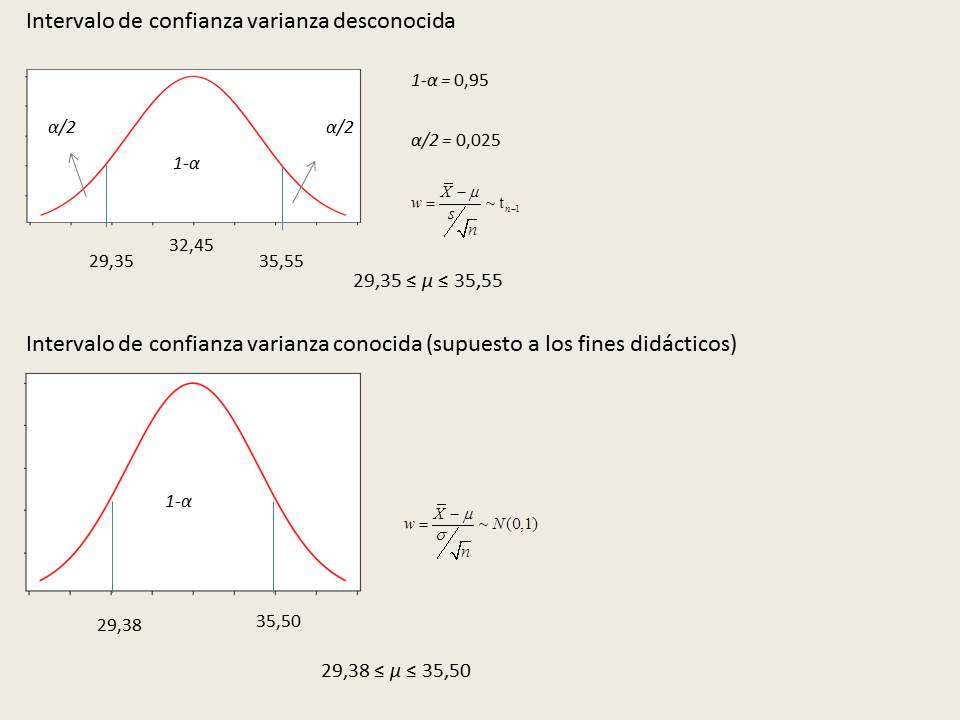

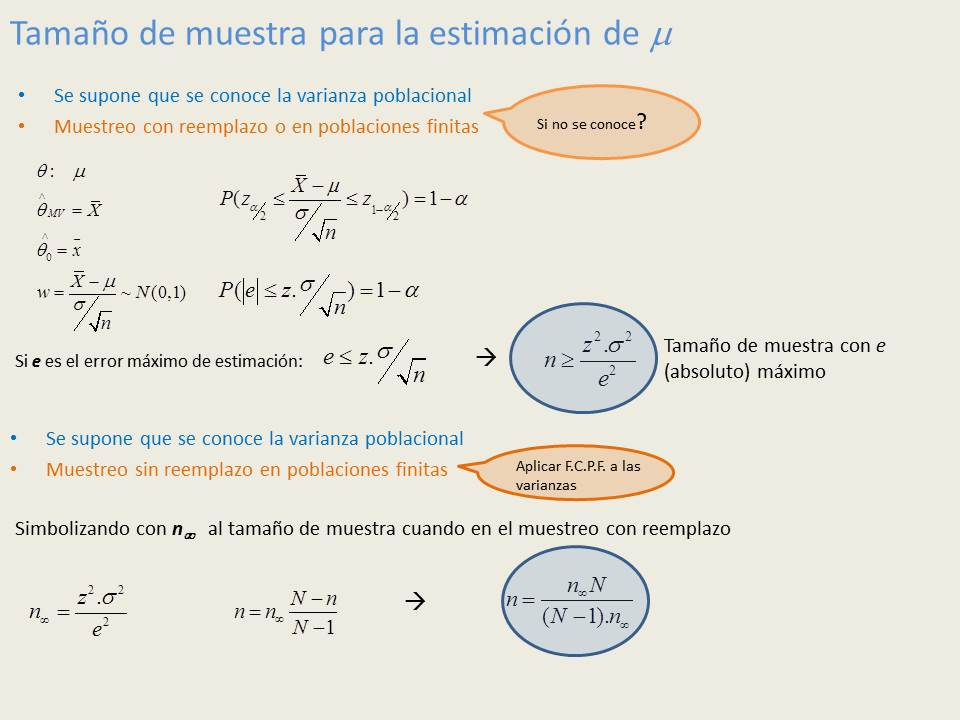

###Intervalo de confianza para la varianza

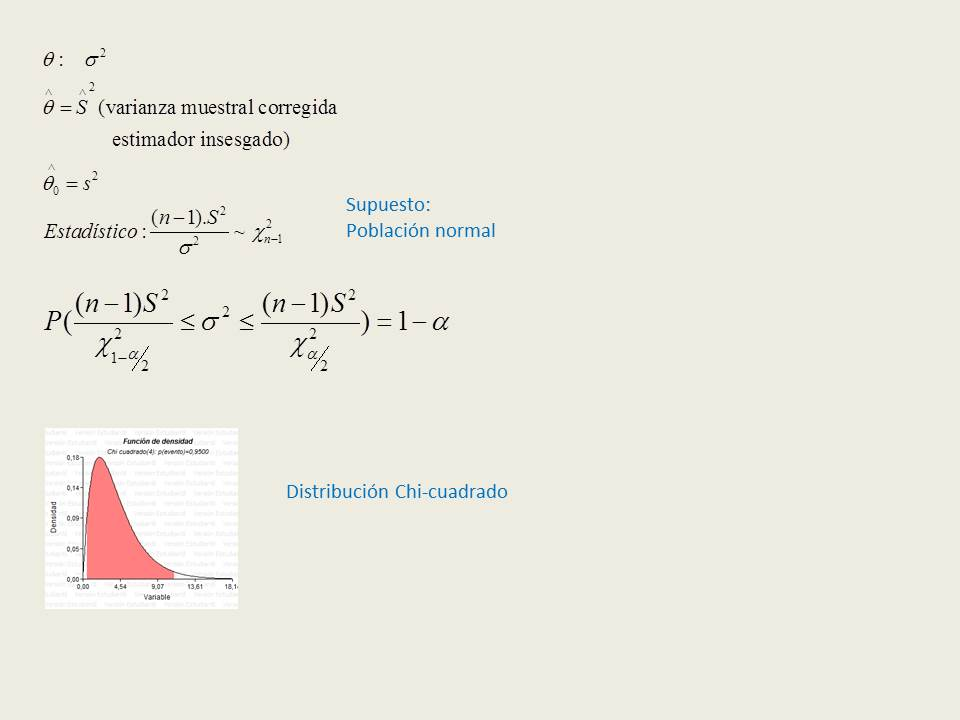

### Intervalo de confianza para la proporción

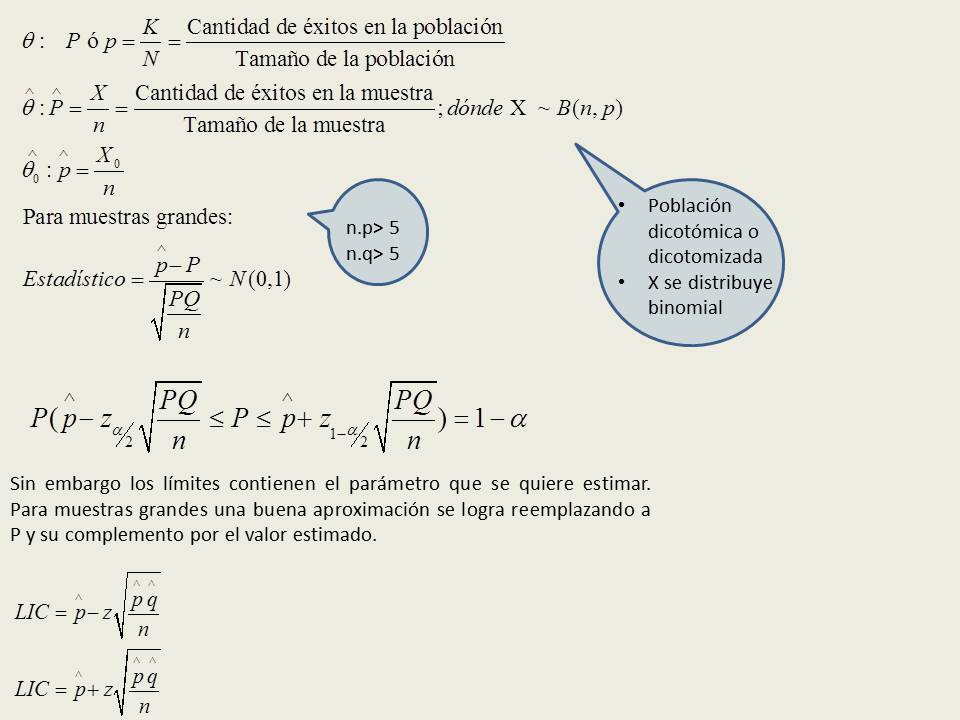

#### por eso siempre es bueno definir bien la poblacion

# PRUEBAS DE HIPÓTESIS PARA UNA POBLACIÓN

#### hipotesis estadistica es una afirmacion respecto a alguna caracteristica, la prueba de hipotesis es juzgar si la afirmacion se encuentra apoyada por evidencia 

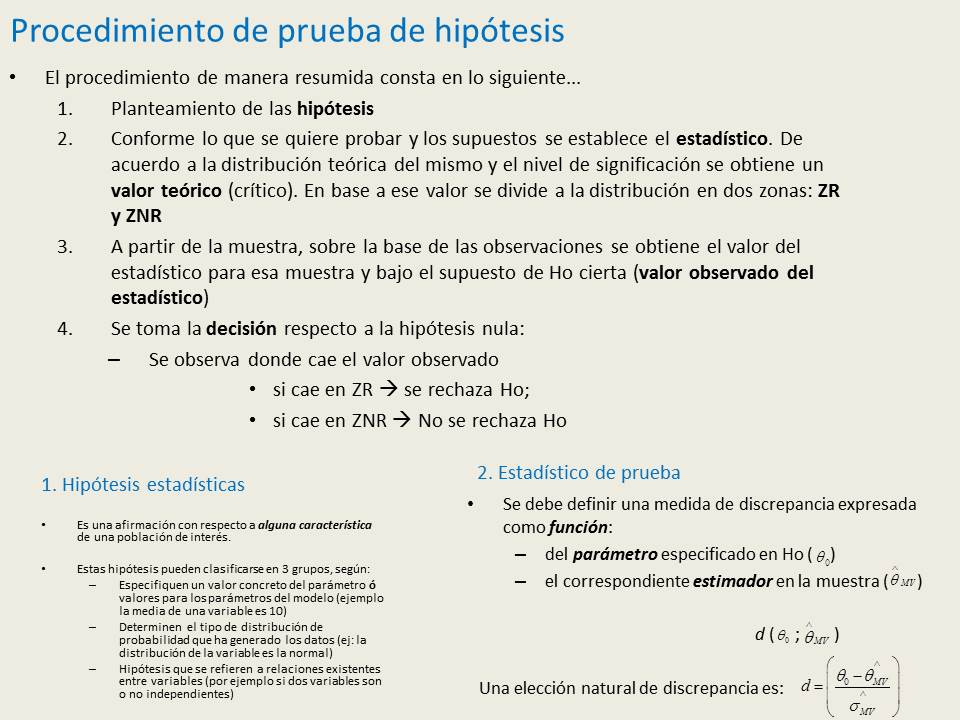

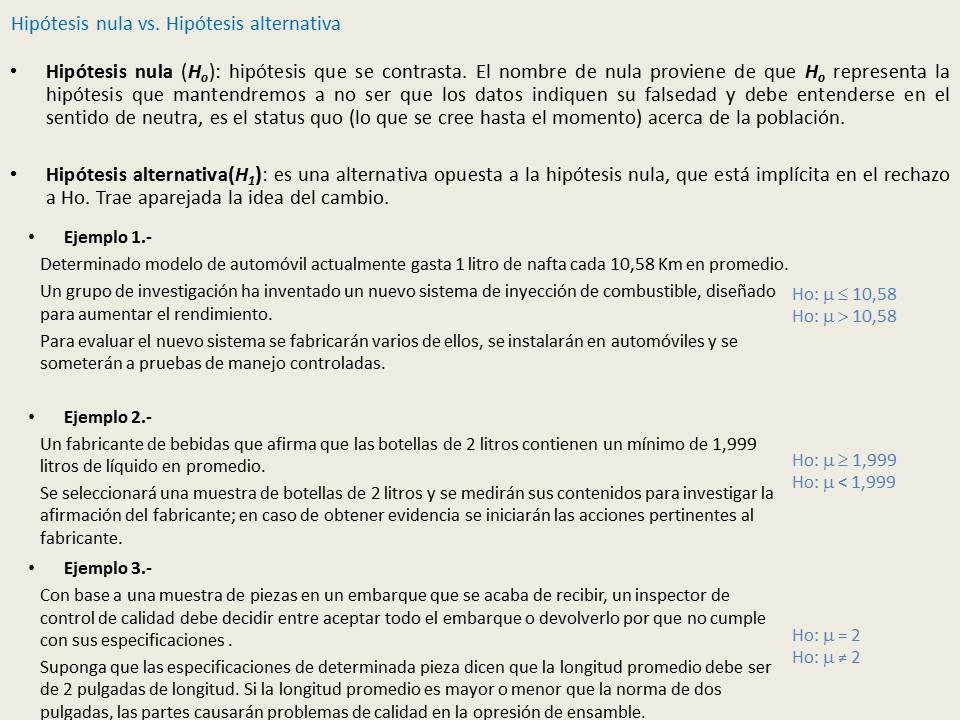

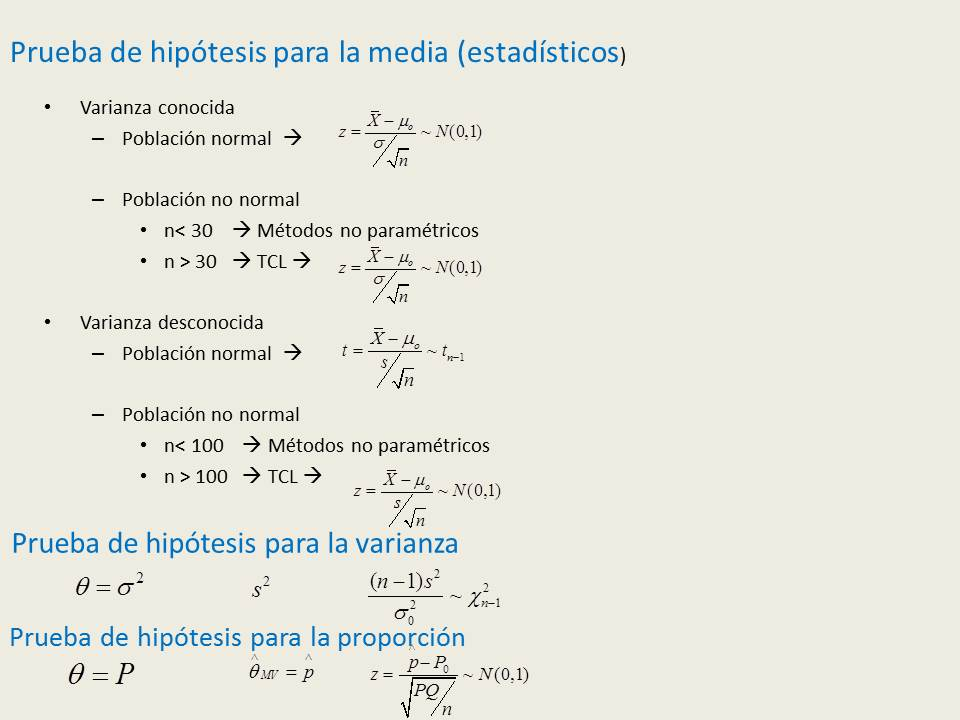

###**Prueba de hipótesis para la media**
    

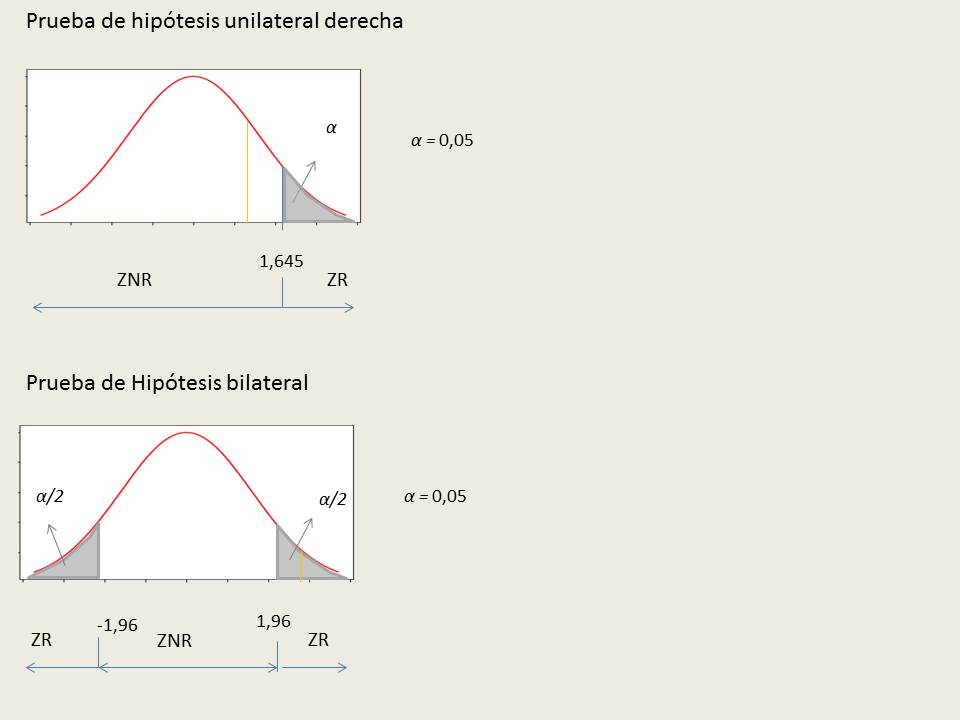

#### Ejemplo pueba de hipótesis para la media

$H_0$: $\mu$=21

$H_1$: $\mu$$\geq$21

In [20]:
#prueba unilateral derecha
x_=np.mean(df1.Aportes) #media muestral
s = np.std(df1.Aportes,ddof=0) #desvio estandar de la muestra
M=21 #media poblacionla bajo h0 cierta
Sx=15 #sigma poblacional conocida
n=len(df1.Aportes)
z=(x_-M)/(Sx/np.sqrt(n))#z observada 
print(x_)
print(s)
print(n)
print(z)

22.0
13.24764129949177
20
0.29814239699997197


In [23]:
vp = 1 - ss.norm.cdf(z) #de la normal la probabilidad acumulada
print(vp) # valor de probabilidad-p valor este se compara con alfa

#p valor-probabilidad de que quede a la derecha del estadistico observado, como es mayor del z critico rechazamos(o no????) la hipotesis nula
#los datos no nos dan evidencia suficiente como para rechazar

0.382797241997882


**Prueba t**

In [24]:
x_=np.mean(df1.Aportes)
s = np.std(df1.Aportes,ddof=0)
M=21
#Desconocida Sx
n=len(df1.Aportes)
tobs=(x_-M)/(s/np.sqrt(n))
print(tobs)

0.33757978902788893


In [25]:
#Valor crítico
ss.t.ppf(1 - 0.05, df=19)

1.729132811521367

In [26]:
tcrit  = ss.t.ppf(1 - 0.05, df=19)
print(tcrit)


1.729132811521367


In [27]:
#Valor de probabilidad
vp = 1 - ss.t.cdf(tobs, df=19)
print(vp)

0.3696904394176319


In [28]:
#Prueba t empleando la función ttest_1samp de “scipy.stats”
pru_t=ss.ttest_1samp(df1['Aportes'],21)
pru_t

Ttest_1sampResult(statistic=0.32903207786188304, pvalue=0.7457306446375818)

### Prueba de hipótesis para la media

#### Ejemplo prueba de hipótesis para la proporción

Se quiere probar que la proporción de poco satisfechos (PS) es 
mayor al 30% 
Po=0,30
Qo=0,70


np=>5 y np=>5

In [29]:
df1["Satisf_ord"]= pd.Categorical(df1["Satisf"],categories=["PS","S","MS"])

In [30]:
#Tabla de frecuencia de la muestra
df1['Satisf_ord'].value_counts() / len(df1['Satisf_ord'])

S     0.35
PS    0.35
MS    0.30
Name: Satisf_ord, dtype: float64

*   p=X/n
*   X:"cantidad de gerentes poco satisfechos"
*   p=0,35


In [31]:
#probando la condición
a=20*0.35
b=20*0.65
print(a,b)

7.0 13.0


In [32]:
p=0.35  #proporción en la muestra
Po=0.30 #proporción bajo hipótesis nula cierta
n=20
zobs=(p-Po)/(np.sqrt(Po*(1-Po)/n))
print(zobs)
vp = 1 - ss.norm.cdf(zobs)
print(vp)

0.4879500364742665
0.31279261576216266


In [33]:
zcrit=ss.norm.ppf(0.95)
print(zcrit)

1.6448536269514722


In [34]:
e=1.64*(Po*(1-Po)/n)
print(e)

0.017219999999999996


# PRUEBAS DE HIPÓTESIS PARA DOS POBLACIONES

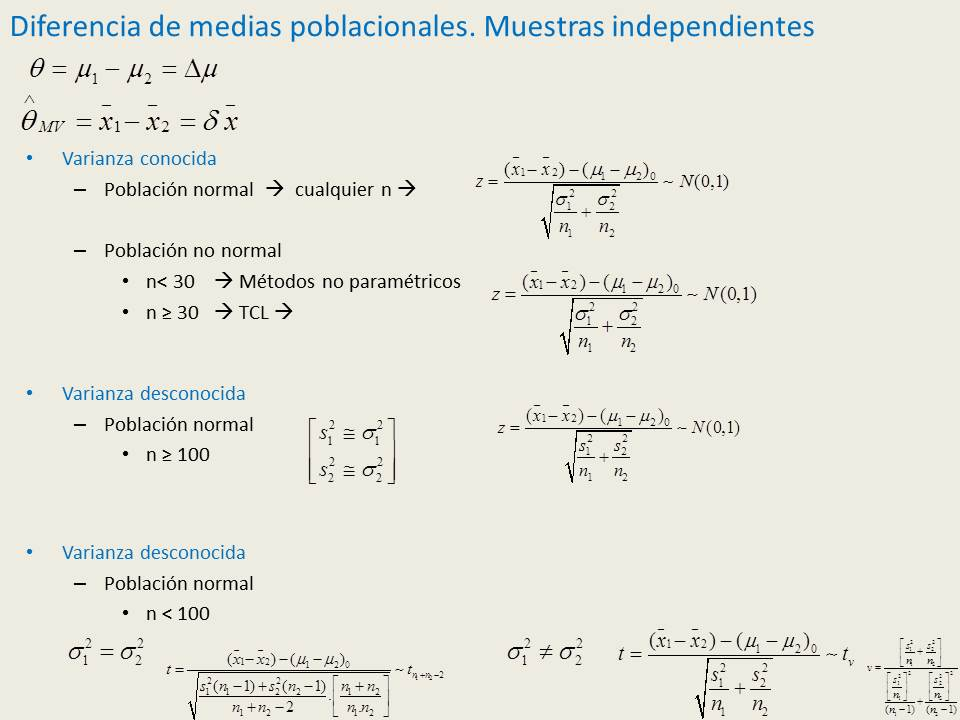

### Ejemplo Diferencia de medias Muestras independientes.

In [35]:
url="https://drive.google.com/file/d/1ZXbF8uude4elcGXuhcE41yTHW7-3FA5C/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df2 = pd.read_csv(path, sep=';')
df2.head()

OBS  HORASEM  TIPOCUP  EDAD  EDUCAC  SEXO  INGRPER  INGRFLIA  SATISF
0    1       50        1    35      20     1     78.3      85.3       2
1    2       50        4    33      12     2     25.2      25.2       1
2    3       50        2    39      18     1     60.8      60.8       2
3    4       30        1    35      16     1     38.4      38.4       2
4    5       32        2    35      12     2     31.0      33.5       1

In [36]:
df2.dtypes

OBS           int64
HORASEM       int64
TIPOCUP       int64
EDAD          int64
EDUCAC        int64
SEXO          int64
INGRPER     float64
INGRFLIA    float64
SATISF        int64
dtype: object

In [37]:
df2.SEXO.unique()

array([1, 2])

In [38]:
# SEXO
df2["Sexo_c"]= pd.Categorical(df2["SEXO"])
df2.Sexo_c.cat.categories=["Varón","Mujer"]
print(df2['SEXO'].value_counts())
print(df2['Sexo_c'].value_counts())

1    60
2    40
Name: SEXO, dtype: int64
Varón    60
Mujer    40
Name: Sexo_c, dtype: int64


In [39]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df2.INGRPER.loc[df2.Sexo_c=='Varón'],name="VARON"))
fig.add_trace(go.Box(y=df2.INGRPER.loc[df2.Sexo_c=='Mujer'],name="MUJER"))
fig.update_layout(
    title={
        'text': "Ingresos personales por sexo",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [40]:
#Prueba de hipótesis diferencia de medias muestra indep (varianzas iguales por defecto)
ss.ttest_ind(df2.INGRPER.loc[df2.Sexo_c=='Varón'],
                df2.INGRPER.loc[df2.Sexo_c=='Mujer'],nan_policy='omit',)

Ttest_indResult(statistic=3.9196392727928866, pvalue=0.00016434856891043252)

#### rechazo la hipotesis nula, (la hipotesis nula es que fueran igual)

In [41]:
#Prueba de hipótesis diferencia de medias muestra indep (varianzas distintas)
ss.ttest_ind(df2.INGRPER.loc[df2.Sexo_c=='Varón'],
                df2.INGRPER.loc[df2.Sexo_c=='Mujer'],nan_policy='omit',equal_var=False)

Ttest_indResult(statistic=4.285755638171458, pvalue=4.274955328755207e-05)

**Conclusión:** con una significación(o riesgo de la prueba) de 5%, existe evidencia para afirmar que el Ingreso personal promedio de los Varones y Mujeres no son iguales. 

In [59]:
por otra parte, 1-alfa es nivel de confianza

SyntaxError: invalid syntax (<ipython-input-59-c24ea2c1ddc3>, line 1)

## Prueba de normalidad

En algunos casos es útil saber si los datos obtenidos de una secuencia de mediciones corresponden a una distribución normal, para esto se utilizan las pruebas de bondad de ajuste especificamente las pruebas de normalidad.

### **Shapiro Wilk**
En estadística, el Test de Shapiro–Wilk se usa para contrastar la normalidad de un conjunto de datos. Se plantea como hipótesis nula que una muestra de tamaño $n$,  ($x_1,x_2,..., x_n$) proviene de una población normalmente distribuida. Fue publicado en 1965 por Samuel Shapiro y Martin Wilk. ​Se considera uno de los test más potentes para el contraste de normalidad.

In [42]:
varon= df2.loc[(df2['SEXO'] == 1)]
mujer = df2.loc[(df2['SEXO']== 2)]

In [43]:
sp,p_varon = ss.shapiro(varon["INGRPER"])
sp,p_mujer = ss.shapiro(mujer["INGRPER"])
print(p_varon, p_mujer)

0.044883035123348236 0.01952284947037697




## Prueba Z para la diferencia de proporciones de dos muestras independientes

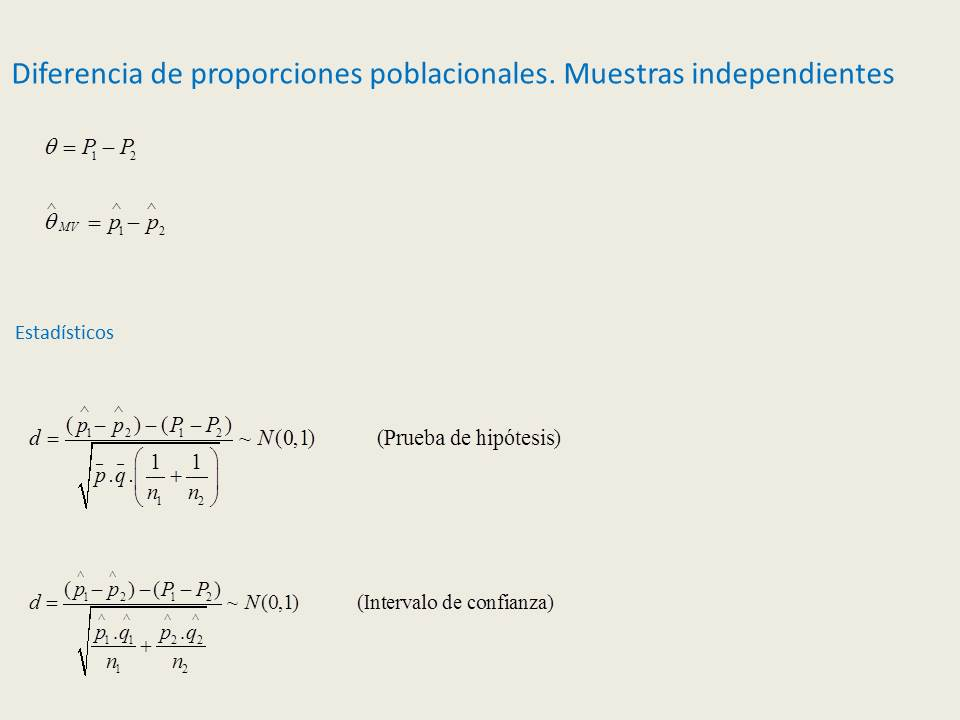

# POTENCIA DE LA PRUEBA y ERRORES TIPO I y II

![img](https://drive.google.com/uc?export=view&id=12nyaOsQiyd49lnFOYhk82YBbjZB8snVI)

# ANÁLISIS DE LA VARIANZA (ANOVA)

$H_0$: $\mu_1=\mu_2=...=\mu_k$

$H_1$: Existe por lo menos una $\mu_j$ distinta a las demás

#### para comparar medias de mas de dos poblaciones, el termino de analisis de varianza se refiere al analisis de variabilidad en terminos de la media
#### la respuesta va a ser la variable dependiente

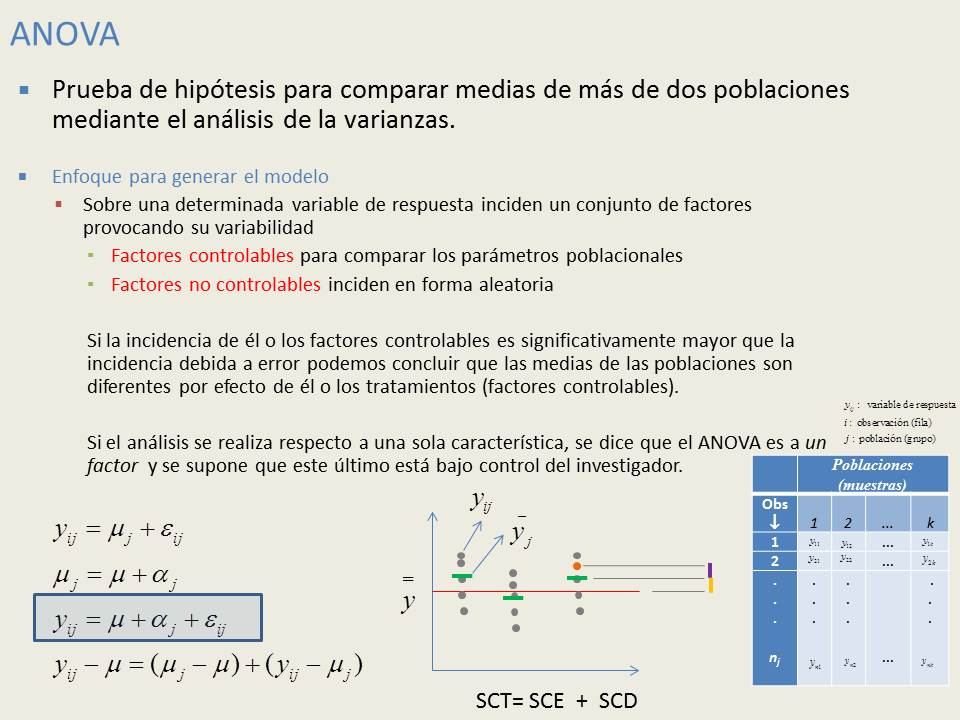

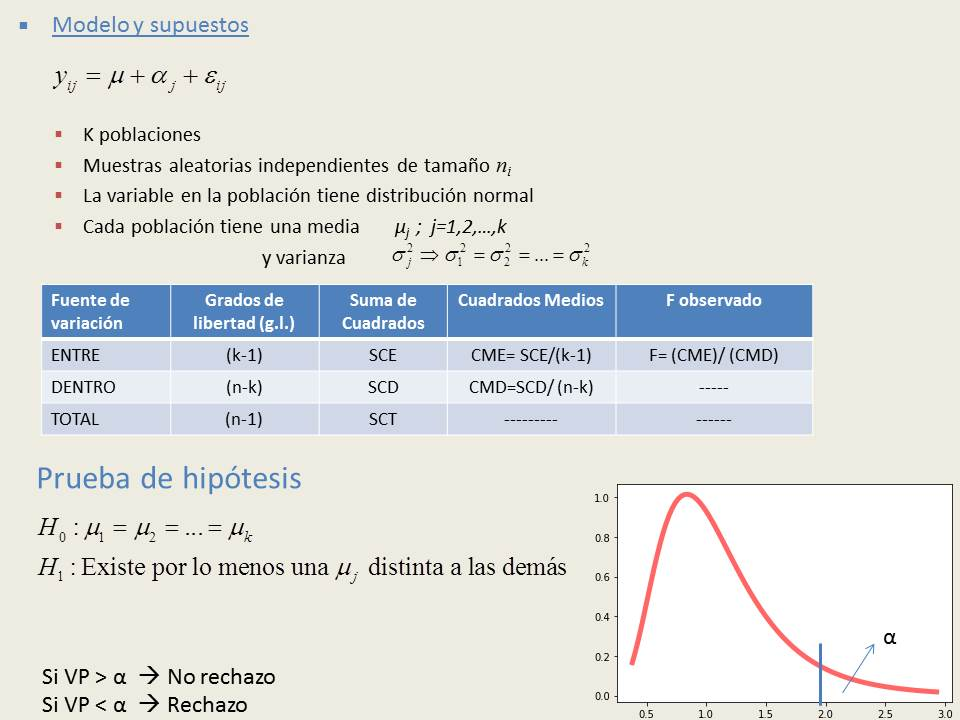

### si al menos en uno es diferente entonces ya cumple
queremos probar igualdad de medias

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import f

La distribución F

In [45]:
dfn, dfd = 29, 18
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

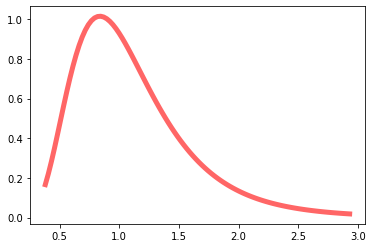

In [46]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

Los datos (arreglo)

In [47]:
df2["TIPOCUP"]= pd.Categorical(df2["TIPOCUP"])#las categorizo
df2.TIPOCUP.cat.categories=["Gerente","Profesional","Técnico/Vtas","Apoy adm","Servicios","Producc","Obrero"]
print(df2.TIPOCUP)
# Por último con la columna SATISF ... cuidado esta variable categórica tiene ESCALA ORDINAL!!
df2["Satisf_c"]= pd.Categorical(df2["SATISF"],ordered=True)
df2.Satisf_c.cat.categories=["Muy insatisfecho","Poco insatisfecho","Moderada satisfacción","Muy satisfecho"]

0          Gerente
1         Apoy adm
2      Profesional
3          Gerente
4      Profesional
          ...     
95         Producc
96     Profesional
97          Obrero
98        Apoy adm
99    Técnico/Vtas
Name: TIPOCUP, Length: 100, dtype: category
Categories (7, object): ['Gerente', 'Profesional', 'Técnico/Vtas', 'Apoy adm', 'Servicios', 'Producc', 'Obrero']


In [48]:
df2.groupby('TIPOCUP').INGRPER.describe() #comparo ingreso segun tipo de ocupacion

count       mean        std   min    25%   50%     75%   max
TIPOCUP                                                                   
Gerente        13.0  41.553846  17.536848  14.7  30.70  42.3  52.600  78.3
Profesional    28.0  36.660714  13.633655  17.9  26.30  34.6  41.825  67.0
Técnico/Vtas   11.0  31.890909  16.707630  16.0  23.85  30.3  33.450  78.0
Apoy adm        9.0  23.333333  12.021751  10.3  16.30  22.7  24.100  52.7
Servicios       9.0  24.911111  15.445505  10.3  16.40  20.2  28.400  59.3
Producc        17.0  37.452941  13.441778  17.0  30.80  36.3  42.700  76.6
Obrero         13.0  19.730769  10.447120  10.5  13.10  14.6  23.700  45.3

## Prueba ANOVA a un Factor

In [49]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('INGRPER ~ C(TIPOCUP)',data=df2).fit()  #+ C(Sexo_c)
anova_table = sm.stats.anova_lm(model,type=2)
print(anova_table)

              df        sum_sq     mean_sq         F   PR(>F)
C(TIPOCUP)   6.0   5365.482782  894.247130  4.431706  0.00055
Residual    93.0  18765.907118  201.783948       NaN      NaN


anova siempre es un a prueba lateral derecha

por lo tanto, rechazamos hipotesis nula de igualdad de medias

luego hacemos test de comparaciones multiples para ver entre que medias hay diferencias significativas 

## Comparaciones múltiples. Test a posteriori de Tukey-Kramer
Honest Significant Difference (HSD)


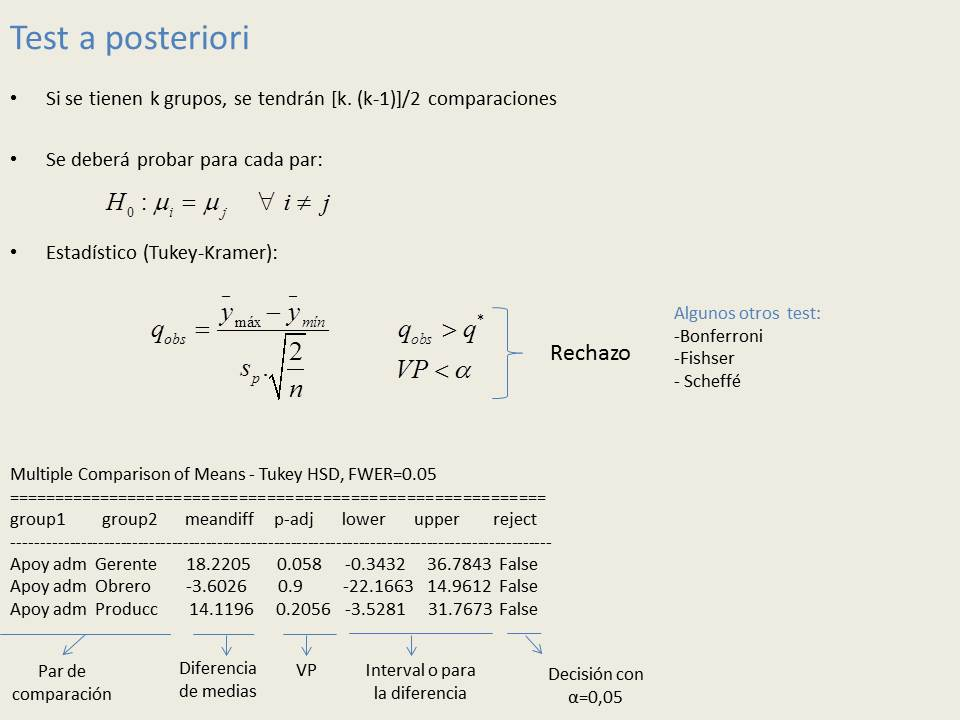

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df2['INGRPER'],df2['TIPOCUP'])
mc_results = mc.tukeyhsd()
print(mc_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2    meandiff p-adj   lower    upper  reject
----------------------------------------------------------------
   Apoy adm      Gerente  18.2205  0.058  -0.3432 36.7843  False
   Apoy adm       Obrero  -3.6026    0.9 -22.1663 14.9612  False
   Apoy adm      Producc  14.1196 0.2056  -3.5281 31.7673  False
   Apoy adm  Profesional  13.3274 0.1906  -3.0766 29.7313  False
   Apoy adm    Servicios   1.5778    0.9 -18.6031 21.7587  False
   Apoy adm Técnico/Vtas   8.5576 0.8097 -10.6842 27.7993  False
    Gerente       Obrero -21.8231 0.0031 -38.6146 -5.0315   True
    Gerente      Producc  -4.1009    0.9 -19.8738  11.672  False
    Gerente  Profesional  -4.8931    0.9 -19.2609  9.4746  False
    Gerente    Servicios -16.6427 0.1094 -35.2065   1.921  False
    Gerente Técnico/Vtas  -9.6629 0.6249 -27.2011  7.8753  False
     Obrero      Producc  17.7222 0.0174   1.9493 33.4951   True
     Obrero  Profesional 

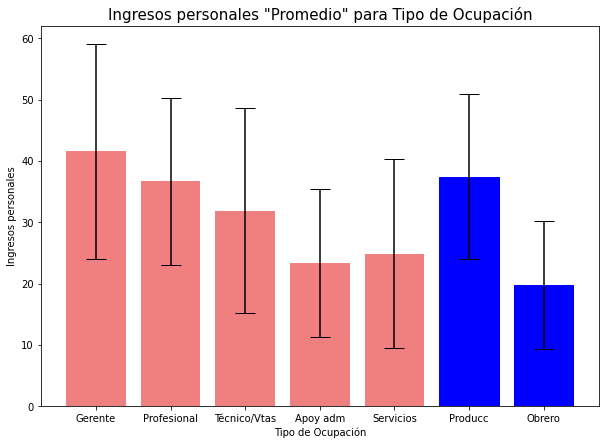

In [51]:
mean= df2.groupby(['TIPOCUP']).INGRPER.mean()
error= df2.groupby('TIPOCUP').INGRPER.std()
x=mean.index

fig,ax=plt.subplots(figsize=(10,7))
barlist =plt.bar(x,mean,yerr=error,color='lightcoral',capsize=10)
barlist[6].set_color('b')
barlist[5].set_color('b')
plt.title('Ingresos personales "Promedio" para Tipo de Ocupación',fontsize=15)
plt.xlabel('Tipo de Ocupación')
plt.ylabel('Ingresos personales')
plt.xticks(x, rotation=0)
plt.savefig('one_way_anova.png')
plt.show();

##Otra opción de código para ANOVA a un Factor

In [52]:
print(ss.f_oneway(df2['INGRPER'][df2['TIPOCUP'] == "Gerente"],
                df2['INGRPER'][df2['TIPOCUP'] == 'Profesional'], 
                df2['INGRPER'][df2['TIPOCUP'] ==  'Técnico/Vtas'],
               df2['INGRPER'][df2['TIPOCUP'] == 'Apoy adm'],
               df2['INGRPER'][df2['TIPOCUP'] == 'Servicios'],
               df2['INGRPER'][df2['TIPOCUP'] == 'Producc'],
               df2['INGRPER'][df2['TIPOCUP'] == 'Obrero']))

print('Se rechaza la Hipótesis Nula de igualdad de todas la medias, si p valor < Alpha ')

F_onewayResult(statistic=4.431705996892173, pvalue=0.0005504645188293248)
Se rechaza la Hipótesis Nula de igualdad de todas la medias, si p valor < Alpha 


## Homogeneidad de varianzas

In [ ]:
# verificamos que cada varianza sea homogenea

In [53]:
ip_gerente = df2.loc[df2.TIPOCUP == 'Gerente', 'INGRPER']
ip_profesional = df2.loc[df2.TIPOCUP == 'Profesional', 'INGRPER']
ip_adm = df2.loc[df2.TIPOCUP == 'Apoy adm', 'INGRPER']
ip_tecnico = df2.loc[df2.TIPOCUP == 'Técnico/Vtas', 'INGRPER']
ip_servicio = df2.loc[df2.TIPOCUP == 'Servicios', 'INGRPER']
ip_produccion = df2.loc[df2.TIPOCUP == 'Producc', 'INGRPER']
ip_obrero = df2.loc[df2.TIPOCUP == 'Obrero', 'INGRPER']

In [54]:
# Levene test
levene_test = ss.levene(ip_gerente , ip_profesional,ip_adm, ip_tecnico, ip_servicio, ip_produccion,ip_obrero)
levene_test

LeveneResult(statistic=0.4718655987059822, pvalue=0.8276244207704234)

In [55]:
# Bartlett test
bartlett_test = ss.bartlett(ip_gerente , ip_profesional,ip_adm, ip_tecnico, ip_servicio, ip_produccion,ip_obrero)
bartlett_test

BartlettResult(statistic=4.244590440854291, pvalue=0.6436146955475242)

In [56]:
# Fligner-Killeen test
fligner_test = ss.fligner(ip_gerente , ip_profesional,ip_adm, ip_tecnico, ip_servicio, ip_produccion,ip_obrero)
fligner_test

FlignerResult(statistic=3.9082938622169454, pvalue=0.6890852928627997)

## Pruebas de Normalidad

In [57]:
sp,p_gerente = ss.shapiro(ip_gerente)
sp,p_profesional = ss.shapiro(ip_profesional)
sp,p_adm = ss.shapiro(ip_adm)
sp,p_tecnico = ss.shapiro(ip_tecnico)
sp,p_servicio = ss.shapiro(ip_servicio)
sp,p_produccion = ss.shapiro(ip_produccion)
sp,p_obrero = ss.shapiro(ip_obrero)

vp= p_gerente, p_profesional, p_adm, p_tecnico, p_servicio, p_produccion, p_obrero
vp

(0.6346667408943176,
 0.030331270769238472,
 0.009879129007458687,
 0.0010439208708703518,
 0.05654655769467354,
 0.07013437896966934,
 0.014146645553410053)

In [58]:
sp,p_gerente = ss.shapiro(ip_gerente)
sp,p_profesional = ss.shapiro(ip_profesional)
sp,p_adm = ss.shapiro(ip_adm)
sp,p_tecnico = ss.shapiro(ip_tecnico)
sp,p_servicio = ss.shapiro(ip_servicio)
sp,p_produccion = ss.shapiro(ip_produccion)
sp,p_obrero = ss.shapiro(ip_obrero)

print("Gerentes el VP es:", p_gerente)
print("Profesional el VP es:",p_profesional)
print("Administrativos el VP es:",p_adm)
print("Técnicos el VP es:",p_tecnico )
print("Servcicios el VP es:",p_servicio)
print("Producción el VP es:",p_produccion)
print("Obrero lel VP es:",p_obrero)



Gerentes el VP es: 0.6346667408943176
Profesional el VP es: 0.030331270769238472
Administrativos el VP es: 0.009879129007458687
Técnicos el VP es: 0.0010439208708703518
Servcicios el VP es: 0.05654655769467354
Producción el VP es: 0.07013437896966934
Obrero lel VP es: 0.014146645553410053
